In [2]:
print('deep assignment')

deep assignment


In [3]:
!pip install kagglehub

import kagglehub

# Download the Pima Indians Diabetes Dataset
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [4]:
import pandas as pd

# Adjust the file path if needed; often the CSV file is directly under the downloaded path
df = pd.read_csv(path + "/diabetes.csv")
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Print the original number of rows
print("Original number of rows:", df.shape[0])

# Columns where zero is considered as a missing value
cols_with_zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace zeros with NaN for these columns
for col in cols_with_zero_as_missing:
    df[col] = df[col].replace(0, np.nan)

# Count the number of rows with at least one missing value in the specified columns
rows_with_missing = df[cols_with_zero_as_missing].isnull().any(axis=1).sum()
print("Number of rows with missing values (after replacing zeros):", rows_with_missing)

# Impute missing values using the median
for col in cols_with_zero_as_missing:
    df[col] = df[col].fillna(df[col].median())

# Verify that missing values are handled
print("Missing values after imputation:")
print(df.isnull().sum())

# Separate features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training+validation (80%) and test (20%) sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Further split the temporary set into training (70% overall) and validation (10% overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

# Display shapes of the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Original number of rows: 768
Number of rows with missing values (after replacing zeros): 376
Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Training set shape: (537, 8)
Validation set shape: (77, 8)
Test set shape: (154, 8)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

# Define the feedforward neural network (MLP)
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Set up early stopping callback to monitor validation loss
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model using batch training with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.6024 - loss: 1.5320 - val_accuracy: 0.7403 - val_loss: 1.2354
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7430 - loss: 1.1475 - val_accuracy: 0.7143 - val_loss: 1.0935
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8079 - loss: 0.9755 - val_accuracy: 0.6623 - val_loss: 0.9797
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7524 - loss: 0.9204 - val_accuracy: 0.6753 - val_loss: 0.8762
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8253 - loss: 0.7431 - val_accuracy: 0.6753 - val_loss: 0.7939
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7587 - loss: 0.7080 - val_accuracy: 0.7013 - val_loss: 0.7345
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7611 - loss: 0.6664 - val_accuracy: 0.6623 - val_loss: 0.7302
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7755 - loss: 0.5954 - val_accuracy: 0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Confusion Matrix:
[[86 14]
 [24 30]]
Precision: 0.6818181818181818
Recall: 0.5555555555555556
F1-score: 0.6122448979591837

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       100
           1       0.68      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



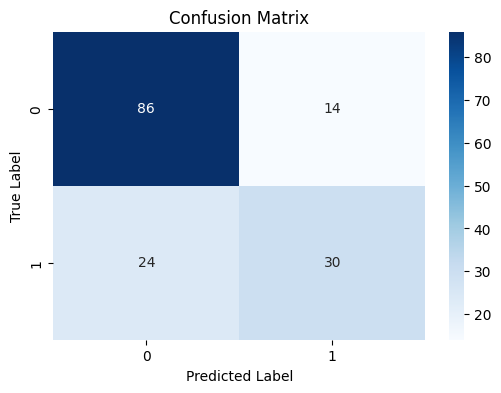

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype("int32")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Optionally, print a full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 


  0%|          | 0/154 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
313/313 ━━━━━

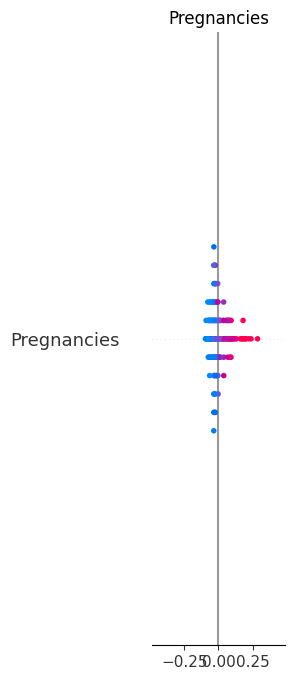

In [25]:
import shap
import numpy as np

# Get feature names from the original dataframe
feature_names = df.drop("Outcome", axis=1).columns

# Select a background sample from the training set (using a random subset)
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# Use KernelExplainer, which only requires a predict function
explainer = shap.KernelExplainer(model.predict, background)

# Compute SHAP values for X_test (you can adjust nsamples for accuracy/speed tradeoff)
shap_values = explainer.shap_values(X_test, nsamples=100)

# Debug: Check shapes
print("X_test shape:", X_test.shape)
print("SHAP values shape:", np.array(shap_values).shape)

# Plot the SHAP feature importance as a bar plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")


In [28]:
!pip install scikeras
